In [1]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.metrics import classification_report, plot_confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, LSTM, Bidirectional, TimeDistributed

# Import TensorBoard
from tensorflow.keras.callbacks import TensorBoard


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = 'earData' 

In [3]:
earData = pd.read_csv(f'matlab_3/{file_name}.csv', header=None)

In [4]:
earData

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,-0.818415,-0.874494,-1.260891,-1.292784,-1.403688,-1.315749,-0.948090,-0.537061,-0.270595,-0.110108,...,-0.521784,-0.555027,-0.557169,-0.445947,-0.354538,-0.355374,-0.405451,-0.500183,-0.561533,-0.439675
1,0.361113,1.153618,1.613955,1.708345,1.677398,1.498725,1.215761,0.889852,0.716699,0.654330,...,0.256515,0.049788,0.047383,0.170013,0.317244,0.493174,0.580226,0.587390,0.437898,0.453763
2,-0.389168,-0.726792,-0.632793,-0.644801,-0.696319,-0.725344,-0.792625,-0.868474,-0.910347,-0.922304,...,0.052333,-0.106454,-0.455574,-0.616528,-0.580989,-0.373123,-0.262629,-0.237650,-0.180289,-0.738516
3,-1.088851,-0.830485,-0.550468,-0.343223,-0.281268,-0.247437,-0.233684,-0.285380,-0.371744,-0.462236,...,-1.012517,-0.925254,-0.837979,-0.660976,-0.579368,-0.668007,-0.645332,-0.566979,-0.677671,-0.425597
4,-0.642761,-1.627180,-1.719740,-1.760248,-1.733624,-1.645700,-1.629358,-1.645586,-1.749495,-1.900857,...,-0.649971,-0.636811,-0.756820,-0.631722,-0.523140,-0.569179,-0.628703,-0.680324,-0.890993,-0.806969
5,1.455742,0.069082,-0.472110,-0.593071,-0.115186,0.264784,0.358054,0.514414,0.544388,0.377408,...,1.193085,1.139563,1.160772,1.304615,1.419238,1.499217,1.563657,1.584916,1.391167,1.301899
6,-0.787172,-0.922825,-0.451553,-0.293431,-0.225988,-0.157691,-0.192203,-0.306790,-0.340169,-0.381643,...,-1.167541,-1.095181,-0.970638,-0.861034,-0.730844,-0.546379,-0.470893,-0.462869,-0.378325,-0.657718
7,-0.885521,-0.845399,-0.939942,-0.969148,-1.190163,-1.369574,-1.442960,-1.459660,-1.475208,-1.476019,...,-1.246085,-1.269616,-1.126205,-0.981636,-0.923882,-0.983652,-0.950535,-0.898144,-0.941895,-0.512334
8,-0.158590,0.304853,0.626060,0.811121,0.967369,1.125192,1.283594,1.352320,1.421686,1.471074,...,0.287754,0.344270,0.460166,0.292584,0.218749,0.435076,0.553665,0.624331,0.960704,0.710134
9,-0.585354,-0.213942,0.015887,0.060019,-0.104781,-0.240276,-0.304792,-0.371146,-0.348979,-0.250451,...,-0.484668,-0.715716,-0.904662,-0.940197,-0.863986,-0.699822,-0.555589,-0.469165,-0.440468,-0.653573


In [5]:
earData = earData.to_numpy()

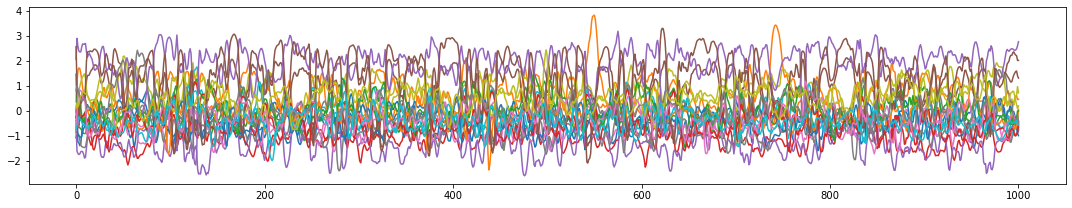

In [6]:
plt.figure(figsize=(15,3))
for observation in earData:
    plt.plot(observation, label=f'Observation {observation[0]}')
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_roc_curve

In [9]:
n_components = .99
pca = PCA(n_components=n_components)

In [10]:
pca.fit(earData)
print('Number of components : ', pca.n_components_)
print('Explained variance ratio : ', pca.explained_variance_ratio_)

Number of components :  16
Explained variance ratio :  [0.71139415 0.14254431 0.0276608  0.01938124 0.01653934 0.01374606
 0.0105243  0.00836    0.00748697 0.00632151 0.00609352 0.00572069
 0.00514891 0.00474245 0.00425412 0.00400368]


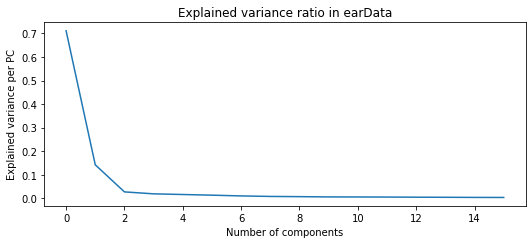

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.title(f'Explained variance ratio in {file_name}')
plt.xlabel('Number of components')
plt.ylabel('Explained variance per PC')
plt.savefig(f'exp_variance/{file_name}.pdf')
plt.show()

In [12]:
X_pca = pca.fit_transform(earData)

In [13]:
X_pca

array([[-1.75918456e+01,  9.11848066e+00, -4.18949619e+00,
         1.01671639e+00,  4.42746902e+00,  8.10964068e-01,
         1.16659298e-01,  1.43993011e-01,  5.49717039e+00,
        -3.10258821e+00,  1.26567213e+00,  4.30734100e+00,
         1.65838186e+00,  4.73298258e+00, -1.56058743e+00,
         3.87901397e-01],
       [ 2.33861587e+01, -1.51493151e+01, -3.98029751e+00,
        -1.00339171e+01, -4.95621245e+00,  9.80206555e+00,
        -8.78231716e-02, -2.88371642e-01, -5.77754404e-01,
        -5.46447669e-01, -3.36327307e-01,  1.20949226e-01,
         4.68744013e-01,  6.03685248e-01, -1.71222270e+00,
        -1.26083620e+00],
       [-9.19923487e+00, -2.97031237e-01, -1.36050659e+00,
        -1.19834698e+00,  3.85303408e+00,  1.58402942e+00,
        -3.78825138e+00,  4.28402572e+00, -1.44629638e+00,
         2.55935229e-01, -3.72134874e+00,  1.62121609e+00,
        -2.60701260e+00,  1.32398343e+00,  5.40866854e+00,
        -1.86793477e+00],
       [-3.46615058e+01,  1.76433490e

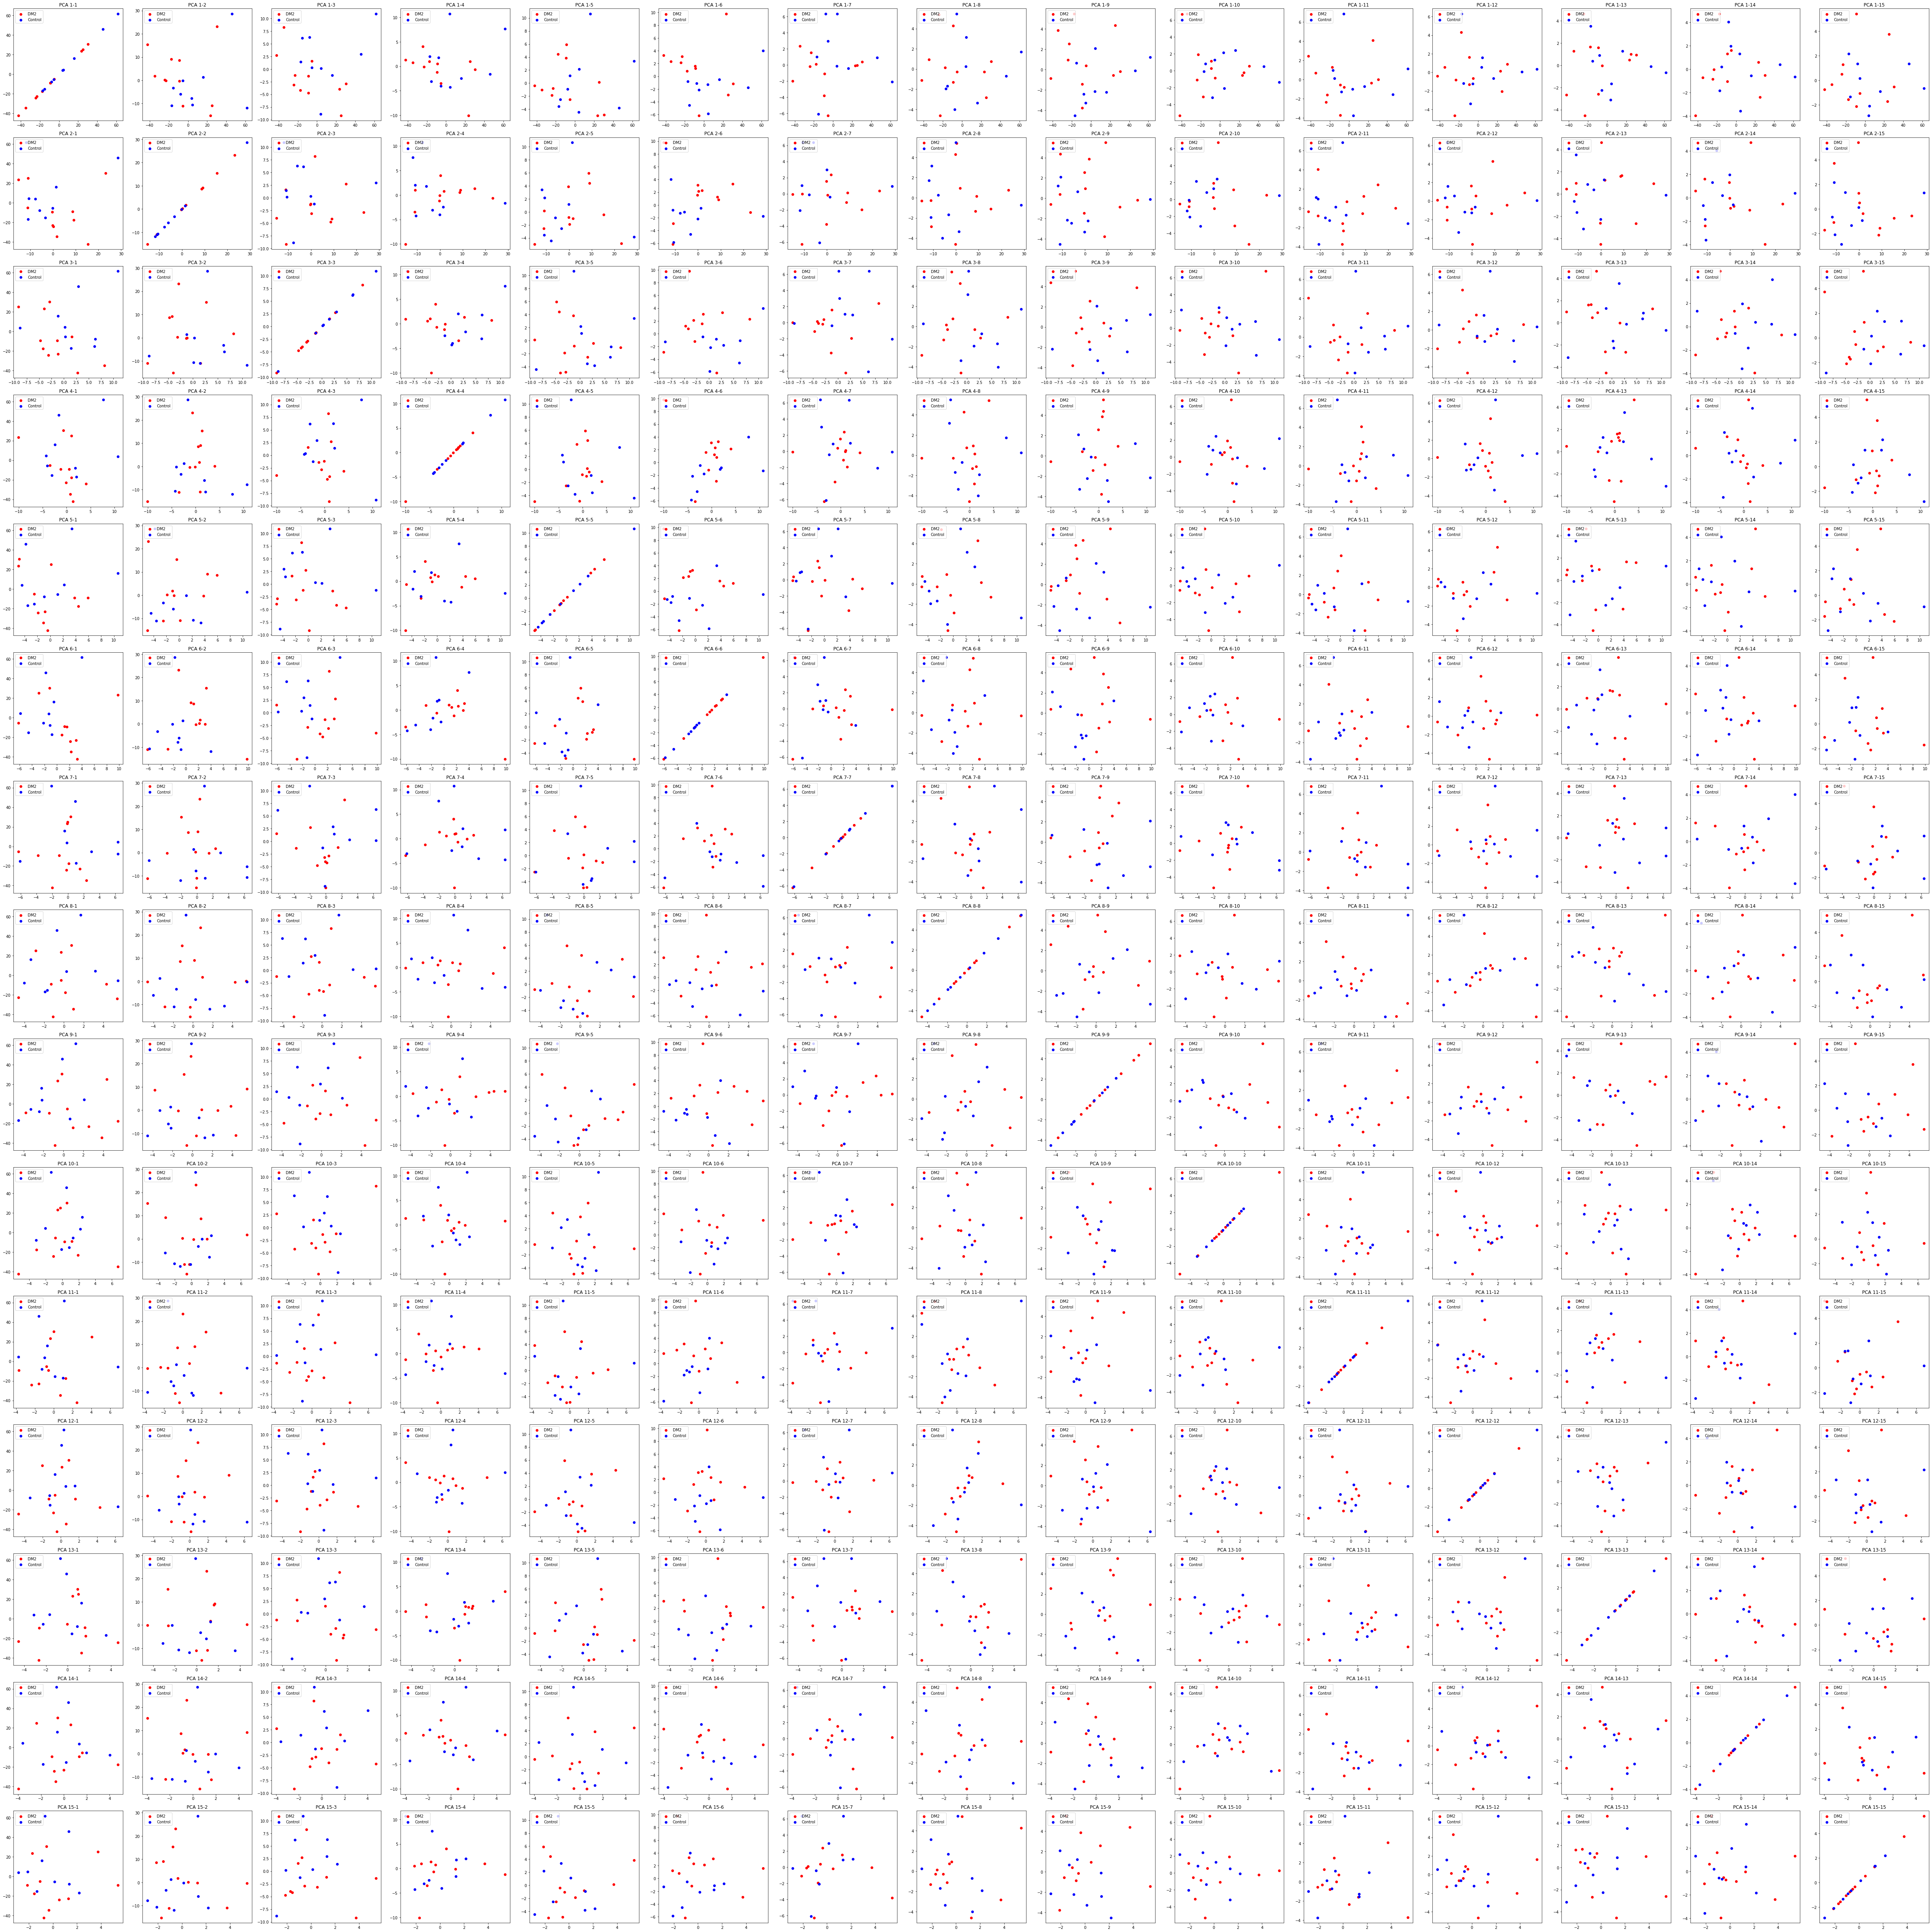

In [14]:
i = 0

fig, axs = plt.subplots(pca.n_components_ - 1, pca.n_components_ - 1, figsize=(70, 70))
for i in range(pca.n_components_ - 1):
    for j in range(pca.n_components_ - 1):
        axs[i, j].scatter(X_pca[:, i][:11], X_pca[:, j][:11], c='red')
        axs[i, j].scatter(X_pca[:, i][11:], X_pca[:, j][11:], c='blue')
        axs[i, j].set_title('PCA ' + str(i+1) + '-' + str(j+1))
        
        axs[i, j].legend(['DM2', 'Control'], loc="upper left")
        

        # axs[i, j].xlabel(f'PC{i + 1}')
        # axs[i, j].ylabel(f'PC{j + 1}')

# plt.title(f'PCA with n_components = {pca.n_components_}')
# plt.savefig(f'plot/pca/{file_name}.pdf', bbox_inches='tight')
plt.show()

<StemContainer object of 3 artists>

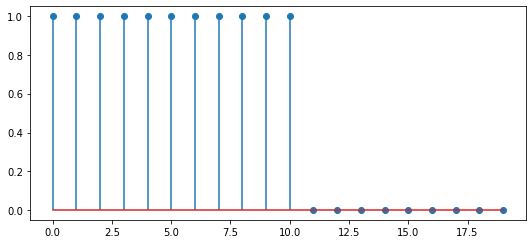

In [8]:
target = pd.read_csv('matlab_raman_preprocessed copy/earData.csv')['has_DM2']
target = np.array([int(x) for x in target])
plt.stem(target)

In [9]:
earData[train].shape

NameError: name 'train' is not defined

In [10]:
def plot_model_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

In [11]:
# Define Tensorboard as a Keras callback
tensorboard = TensorBoard(
  log_dir='.\logs',
  histogram_freq=1,
  write_images=True
)
keras_callbacks = [
  tensorboard
]

2022-06-03 14:17:04.069879: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-03 14:17:04.069901: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-03 14:17:04.070944: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [23]:
sample_size = earData.shape[0] # number of samples in train set
time_steps  = earData.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

earData_reshaped = earData.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", earData_reshaped.shape)
print("1 Sample shape:\n",earData_reshaped[0].shape)
print("An example sample:\n", earData_reshaped[0])

After reshape train data set shape:
 (20, 1001, 1)
1 Sample shape:
 (1001, 1)
An example sample:
 [[-0.81841493]
 [-0.87449424]
 [-1.26089066]
 ...
 [-0.50018331]
 [-0.56153253]
 [-0.43967462]]


In [24]:
target_reshaped = target.reshape(target.shape[0],1,1)

In [77]:
num_folds = 5
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = Adam(learning_rate=0.001)
batch_size = 5
no_epochs = 1000
verbosity = 0
acc_per_fold = []
loss_per_fold = []

n_timesteps = earData_reshaped.shape[1] #13
n_features  = earData_reshaped.shape[2] #1 


# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(earData, target):

  print(train)


  # Define the model architecture
  model = Sequential()
  model.add(Flatten(input_shape=(n_timesteps, n_features)))
  model.add(Dense(10, activation='tanh', kernel_regularizer=l2(100)))
  # model.add(Dropout(0.1))
  model.add(Dense(5, activation='relu'))
  # model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training on fold {fold_no} ...')

  # Fit data to model
  history = model.fit(earData, target,
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              validation_split=0.2,
              callbacks=EarlyStopping(monitor='val_loss', patience=350, verbose=0, mode='auto', restore_best_weights=True))

  # Generate generalization metrics
  scores = model.evaluate(earData[test], target[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}: {model.metrics_names[1]} of {scores[1]*100} %')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

model.summary()

[ 0  2  3  6  7  8  9 10 12 13 14 15 16 17 18 19]
------------------------------------------------------------------------
Training on fold 1 ...


2022-06-03 17:39:51.817328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-03 17:39:56.817944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Score for fold 1: loss of 0.686805784702301: accuracy of 75.0 %
[ 0  1  2  3  4  5  6  8 10 11 12 13 15 17 18 19]
------------------------------------------------------------------------
Training on fold 2 ...


2022-06-03 17:41:04.077310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-03 17:41:09.832431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Score for fold 2: loss of 0.7064591646194458: accuracy of 50.0 %
[ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 19]
------------------------------------------------------------------------
Training on fold 3 ...


2022-06-03 17:41:43.749172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-03 17:41:47.332920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Score for fold 3: loss of 0.828393280506134: accuracy of 50.0 %
[ 0  1  2  3  4  5  7  9 10 11 14 15 16 17 18 19]
------------------------------------------------------------------------
Training on fold 4 ...


2022-06-03 17:42:22.236897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-03 17:42:27.326123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Score for fold 4: loss of 0.8662258982658386: accuracy of 50.0 %
[ 0  1  4  5  6  7  8  9 10 11 12 13 14 16 17 18]
------------------------------------------------------------------------
Training on fold 5 ...


2022-06-03 17:43:00.400661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-03 17:43:06.684257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Score for fold 5: loss of 0.7558391690254211: accuracy of 50.0 %
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_99 (Flatten)         (None, 1001)              0         
_________________________________________________________________
dense_336 (Dense)            (None, 10)                10020     
_________________________________________________________________
dense_337 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_338 (Dense)            (None, 1)                 6         
Total params: 10,081
Trainable params: 10,081
Non-trainable params: 0
_________________________________________________________________


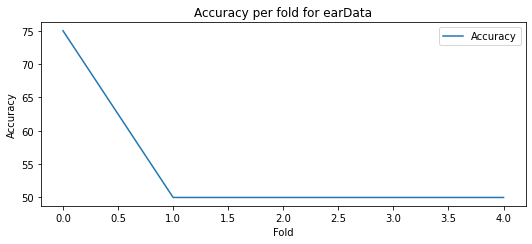

In [78]:
plt.plot(acc_per_fold)
plt.title(f'Accuracy per fold for {file_name}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.savefig(f'plot/nn_{file_name}.pdf', bbox_inches='tight')
plt.show()

In [74]:
def plot_history(history):
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss for {file_name} on last fold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'plot/loss_{file_name}.pdf', bbox_inches='tight')
    plt.show()

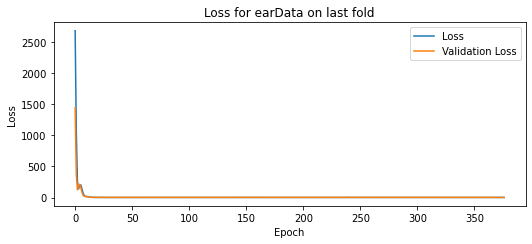

In [79]:
plot_history(history)

In [76]:
acc_per_fold
mean(acc_per_fold)

81.0